# <font color=black> <div align="center"><u style="border-bottom: 2px solid" >Challenge Statement</u>

### 
Global Mart is a large online store with a global reach that offers a wide range of products across various categories, including consumer, corporate, and home office. As the sales manager, your task is to accurately forecast the sales of these products for the next 6 months.

This is essential to ensure that the store has sufficient inventory and can plan its business processes effectively. Without an accurate sales forecast, the store may face challenges such as stock-outs, excess inventory, and missed sales opportunities.

Therefore, your role is critical in helping Global Mart optimize its inventory levels and make informed business decisions.

## <div align="center"> <font color= orange><u style="border-bottom: 2px solid ; ">Data Preparation</u>

### Importing Required libraries

In [1]:
import numpy as np
import statistics as st
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

### Reading CSV File

In [2]:
df = pd.read_csv('Global+Superstore+Data.csv')

### Examine The Data Set

In [3]:
df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [4]:
df.tail()

,Order Date,Segment,Market,Sales,Profit
51285,19-06-2014,Corporate,APAC,65.100,4.5000
51286,20-06-2014,Consumer,US,0.444,-1.1100
51287,02-12-2013,Home Office,US,22.920,11.2308
51288,18-02-2012,Home Office,LATAM,13.440,2.4000
51289,22-05-2012,Consumer,LATAM,61.380,1.8000


In [5]:
df.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [6]:
df.columns

Index(['Order Date', 'Segment', 'Market', 'Sales', 'Profit'], dtype='object')

In [7]:
df.shape

(51290, 5)

In [8]:
df.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

#### Insights:

The dataset in question has 51290 rows and 5 columns, and it is free of any missing values. 

The 5 columns in the dataset are:
1. Order date
2. Segment
3. Market
4. Sales 
5. Profit


### Visualize The Data Set

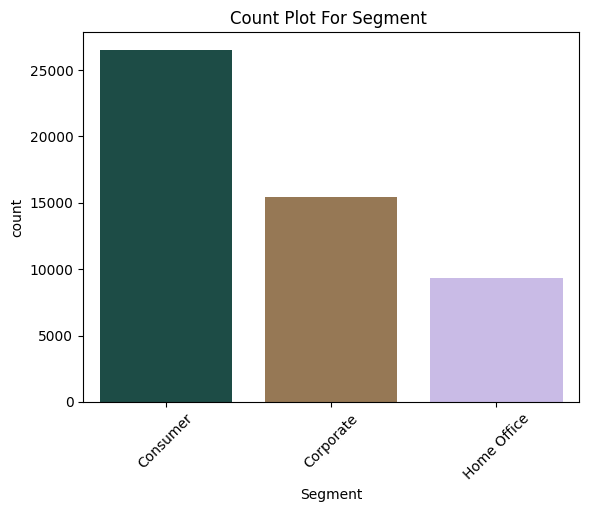

In [9]:
sns.countplot(x = 'Segment', data = df, palette='cubehelix')
plt.title(label = 'Count Plot For Segment ')
plt.xticks(rotation = 45)
plt.show()

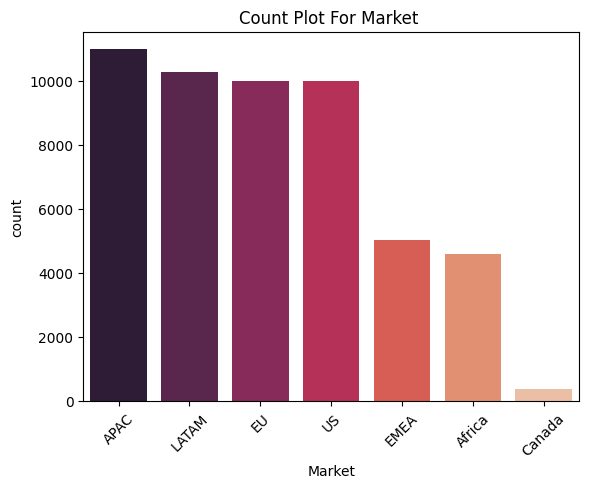

In [10]:
sns.countplot(x = 'Market', data = df,palette='rocket',order=df['Market'].value_counts().index)
plt.title(label = 'Count Plot For Market ')
plt.xticks(rotation = 45)
plt.show()

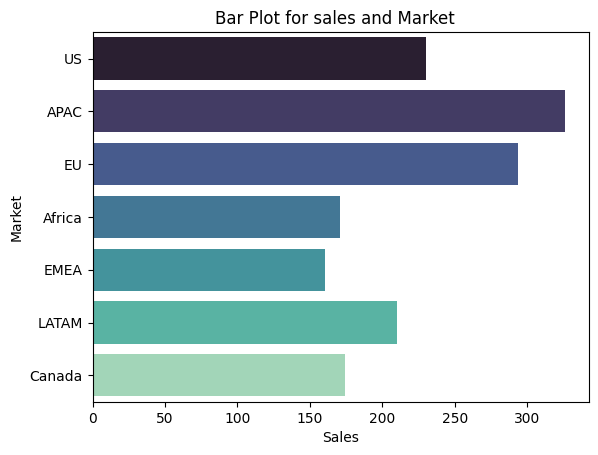

In [11]:
sns.barplot(data = df, x = 'Sales',y= 'Market',palette= 'mako',ci = None)
plt.title(label = 'Bar Plot for sales and Market  ')
plt.show()

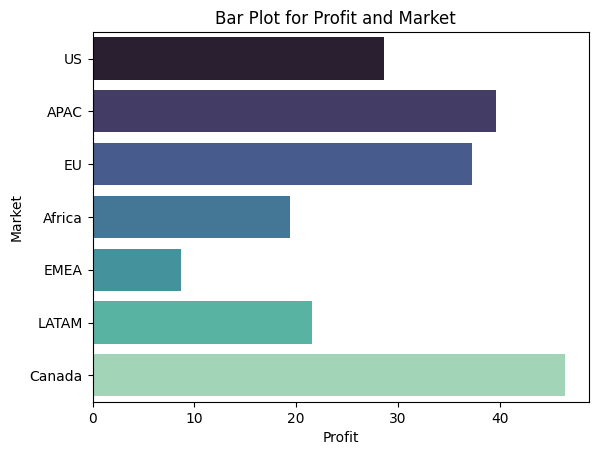

In [12]:
sns.barplot(data = df, x = 'Profit',y= 'Market',palette= 'mako',ci = None)
plt.title(label = 'Bar Plot for Profit and Market  ')
plt.show()

## Lets create a new column by concatanating Market And Segment

In [13]:
df['Market_Segment'] = df['Market']+'_'+df['Segment']

## Examine the data set

In [14]:
df.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US_Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa_Consumer


In [15]:
df.nunique()

Order Date         1430
Segment               3
Market                7
Sales             22995
Profit            24575
Market_Segment       21
dtype: int64

APAC_Consumer         5699
LATAM_Consumer        5321
US_Consumer           5191
EU_Consumer           5186
APAC_Corporate        3283
EU_Corporate          3077
LATAM_Corporate       3053
US_Corporate          3020
EMEA_Consumer         2538
Africa_Consumer       2381
APAC_Home Office      2020
LATAM_Home Office     1920
US_Home Office        1783
EU_Home Office        1737
EMEA_Corporate        1574
Africa_Corporate      1312
EMEA_Home Office       917
Africa_Home Office     894
Canada_Consumer        202
Canada_Corporate       110
Canada_Home Office      72
Name: Market_Segment, dtype: int64


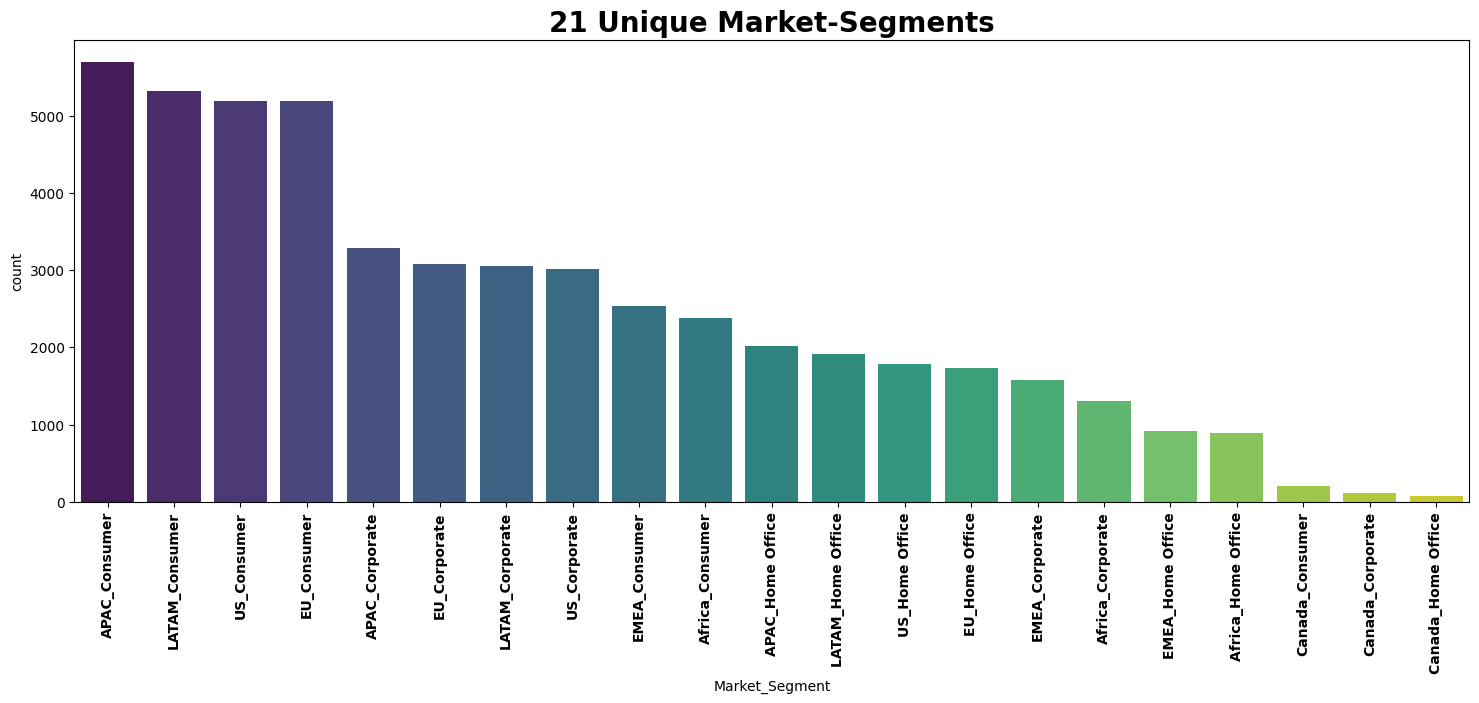

In [16]:
plt.figure(figsize=(18,6))
print(df.Market_Segment.value_counts())
sns.countplot(x='Market_Segment', data=df, palette='viridis', order=df['Market_Segment'].value_counts().index)
plt.title('21 Unique Market-Segments',fontweight='bold', size=20)
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

## Insight :
The store conducted its business in a total of 21 market segments worldwide.

## Lets Drop the Market and Segment Column from the Data Set 

In [17]:
df.drop(['Market','Segment'],axis = 1,inplace = True)
df.head()

,Order Date,Sales,Profit,Market_Segment
0,31-07-2012,2309.650,762.1845,US_Consumer
1,05-02-2013,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,5175.171,919.9710,APAC_Consumer
3,28-01-2013,2892.510,-96.5400,EU_Home Office
4,05-11-2013,2832.960,311.5200,Africa_Consumer


## Lets Visulize the Data set


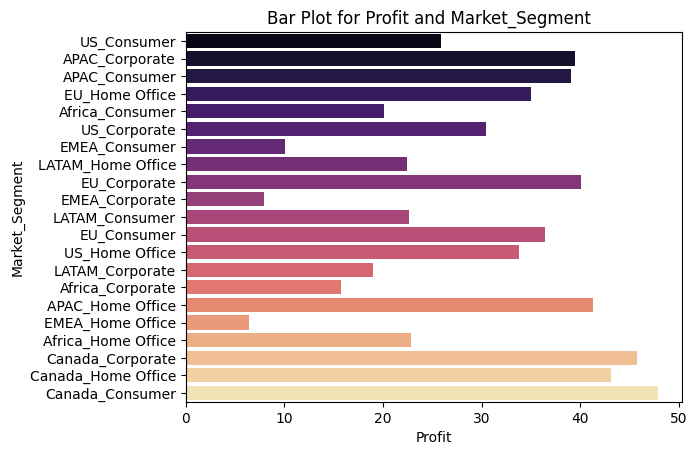

In [18]:
sns.barplot(data=df, x='Profit', y='Market_Segment', palette='magma', ci=None)
plt.title(label = 'Bar Plot for Profit and Market_Segment  ')
plt.show()

## Insight 

Based on the analysis, the top five most profitable market segments worldwide are :


1. Canada_Consumer
2. Canada_Corporate
3. Canada_Home Office
4. Apac_Corporate
5. Apac_Consumer

In [19]:
df['Order Date'] = pd.to_datetime(df['Order Date']).dt.to_period('m')
df= df.sort_values(by=['Order Date'])
df.head()

,Order Date,Sales,Profit,Market_Segment
15262,2011-01,139.65,15.30,EU_Corporate
26744,2011-01,88.44,15.84,EU_Consumer
48614,2011-01,11.43,4.11,EU_Corporate
9417,2011-01,491.00,122.70,LATAM_Consumer
48590,2011-01,4.71,0.00,US_Home Office


### Creating new dataframe Order Date, Market_Segment and Profit With keeping Order Date as Index

In [20]:
df_profit= df.pivot_table( index='Order Date',values='Profit', columns='Market_Segment' ,aggfunc='sum')
df_profit.shape

(48, 21)

## Lets split the data into train and test

In [21]:
train_len = 42
train = df_profit[0:train_len]
test = df_profit[train_len:]

## Lets create COV for train data set
The coefficient of variation (COV) is a statistical measure of the relative variability of a dataset.
1. We compare the variance between the segments using the coefficient of variation which will normalise the standard deviation with the mean and give a comparative figure on the basis of which we can identify the most profitable market segment.
2. We want to forecast the sales where the market segment is reliable or in other words, there is less variation in the profits.

In [22]:
mean=np.mean(train)
std= np.std(train)

CoV_df= pd.DataFrame(mean)
CoV_df['std']= std
CoV_df['CoV'] = std/mean
CoV_df= CoV_df.reset_index()
CoV_df.columns= ['Market_Segment', 'Mean', 'Std', 'CoV']
CoV_df.sort_values(by='CoV', ascending= True, inplace = True)
CoV_df

,Market_Segment,Mean,Std,CoV
0,APAC_Consumer,4400.894243,2300.457687,0.522725
1,APAC_Corporate,2574.919807,1364.837734,0.530051
12,EU_Consumer,3699.977143,2202.282289,0.595215
15,LATAM_Consumer,2295.555697,1569.632686,0.683770
13,EU_Corporate,2216.299429,1600.336696,0.722076
16,LATAM_Corporate,1122.633016,990.360880,0.882177
14,EU_Home Office,1224.456536,1148.627937,0.938072
2,APAC_Home Office,1511.088314,1523.508658,1.008219
18,US_Consumer,2686.740912,2715.031412,1.010530
19,US_Corporate,1754.199083,1880.200775,1.071829


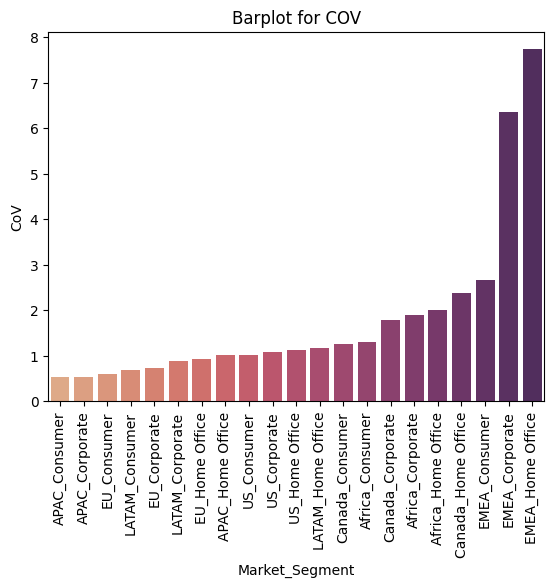

In [23]:
sns.barplot(x='Market_Segment', y= 'CoV', data=CoV_df, palette='flare')
plt.title(label = 'Barplot for COV')
plt.xticks(rotation = 90)
plt.show()

## Insight:
From the analysis, it is evident that the "APAC_Consumer" market segment is one of the most profitable.

Why APAC_Consumer ?

APAC_Consumer comes in top 5 profitable segment but the stability of the profit in apac is high but in other segments it’s not reliable

It is important to note that having a higher coefficient of variation (CoV) for profit does not necessarily imply better performance as it indicates a greater level of variability or uncertainty in the profitability of a business or investment.

Therefore, a lower CoV may be preferable as it implies a more stable and predictable profitability.

## Lets do Time Stamping 

In [24]:
df['Order Date'] = df['Order Date'].astype(str)
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Order Date'].dtype

dtype('<M8[ns]')

### Extract the Data pertaining to the most favorable market segment, which is the APAC Consumer segment.

In [25]:
APAC_Consumer= df[(df.Market_Segment=='APAC_Consumer')]
APAC_Consumer.head()

,Order Date,Sales,Profit,Market_Segment
1080,2011-01-01,1429.050,371.490,APAC_Consumer
9203,2011-01-01,219.780,59.340,APAC_Consumer
19331,2011-01-01,342.510,54.600,APAC_Consumer
26270,2011-01-01,102.762,1.842,APAC_Consumer
14830,2011-01-01,420.420,147.000,APAC_Consumer


## <div align="center"> <font color= Orange><u style="border-bottom: 2px solid ; ">Model Building and Evaluation</u>

## The data will be grouped based on the Order date, and the sales will be determined

In [26]:
data=pd.DataFrame(APAC_Consumer.groupby("Order Date")['Sales'].sum())
data.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


## Lets check the Outliers

In [27]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1
   upper_fence = q3+1.5*IQR
   lower_fence = q1-1.5*IQR



   outliers = [((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   print(" q1 value:", q1,"\n",\
         "q3:",q3,"\n",
         "IQR :",IQR,"\n",\
         "Lower Fence :",\
         lower_fence,"\n",\
         "upper_fence: ", upper_fence)

In [28]:
data.describe()

,Sales
count,48.000000
mean,37849.035425
std,14671.281955
min,12046.092300
25%,26209.485300
50%,36578.300400
75%,48088.354575
max,79834.429500


In [29]:
find_outliers_IQR(data['Sales'])

 q1 value: 26209.4853 
 q3: 48088.354575000005 
 IQR : 21878.869275000005 
 Lower Fence : -6608.818612500007 
 upper_fence:  80906.65848750001


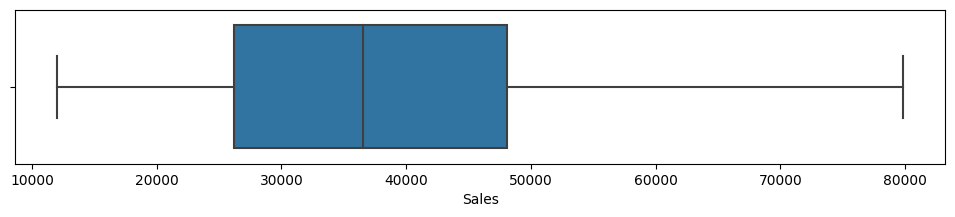

In [30]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Sales'],whis=1.5)

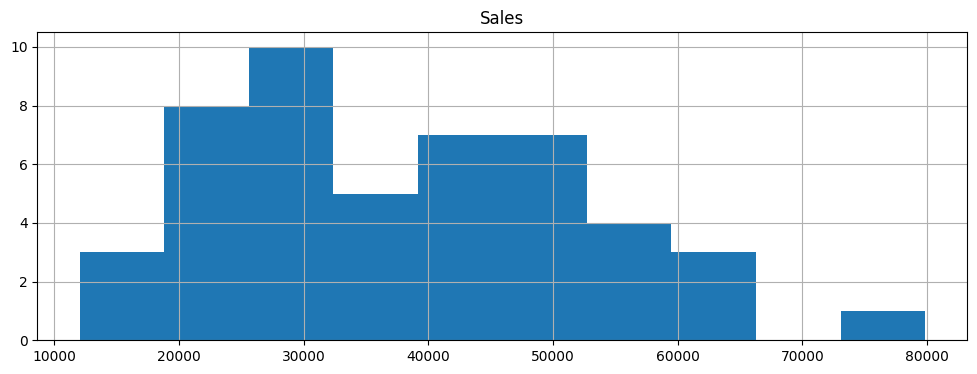

In [31]:
fig = data.hist(figsize = (12,4))

## Insight
We have observed that there are no extreme or unusual values in the new dataset.




## Lets Visualize the Data set

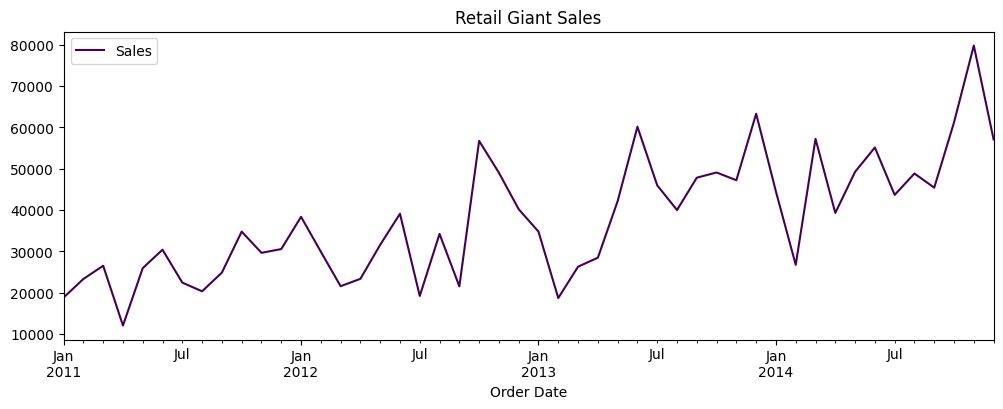

In [32]:
data.plot(figsize=(12, 4),colormap ='viridis')
plt.legend(loc='best')
plt.title('Retail Giant Sales')
plt.show(block=False)

## Insight:
The dataset does not contain any null or missing values. However, the mean and variance of the data are unstable and are fluctuating.

## Lets perform train and test split

In [33]:
train_len = 42
train = data[0:train_len] 
test = data[train_len:] 

## Lets perform decomposition

## 

### What is Decomposition?
Decomposition is a powerful technique that can help analysts gain insights into the structure of a time series and facilitate better forecasting and decision-making.

In [34]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8

## Lets perform Additive Analysis

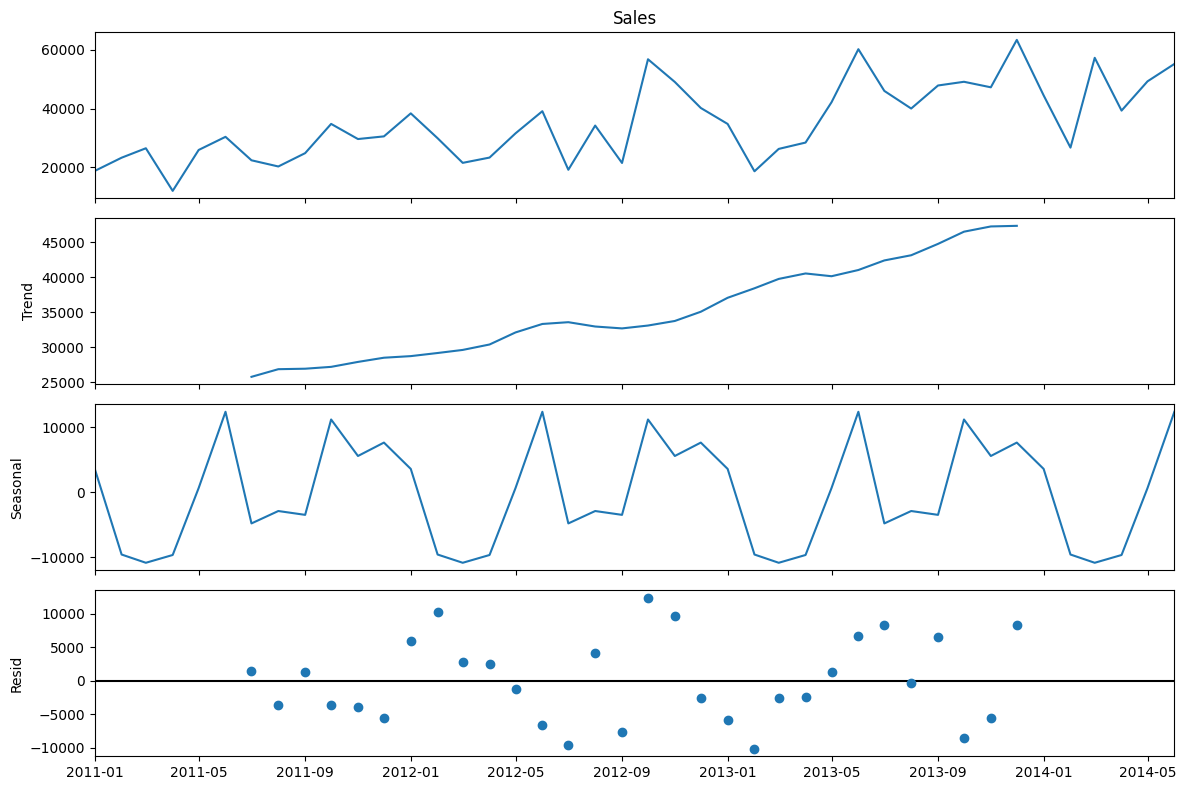

In [35]:
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='additive') 

fig =decomposition.plot()
plt.show()

## Insights:

1. Trends:
There is an upward trend in the data.

2. Seasonal:
The data changes in a periodic manner.

3. Residual:
The residual component of the data exhibits a sinusoidal pattern

## Lets check the multiplicative decoposition

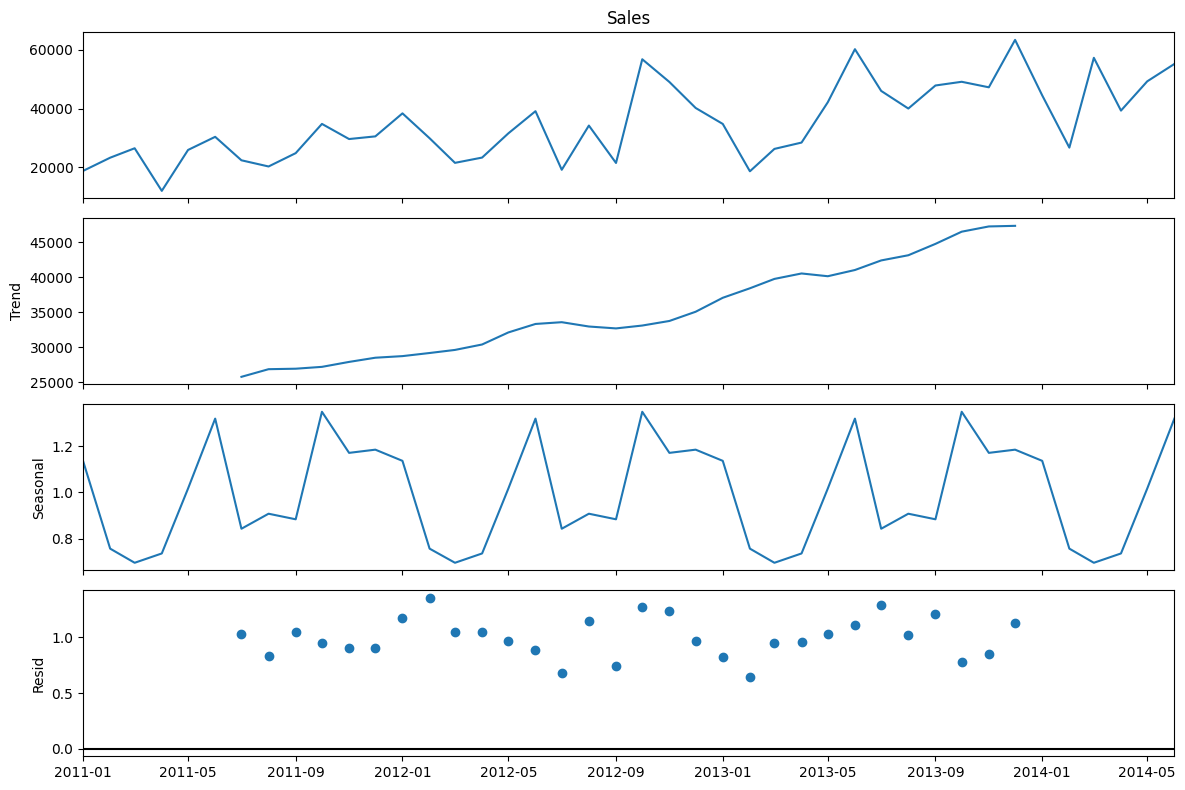

In [36]:
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='multiplicative') 
fig = decomposition.plot()
plt.show()

## Insights:

1. Trends:
The data shows a positive trend or an increasing trend over time.

2. Seasonal:
The data exhibits periodic or cyclical changes that are repetitive over a fixed period of time. Since the data displays seasonality, it is appropriate to use a multiplicative seasonal index.

3. Residual:
The residual component of the data indicates a sinusoidal or wave-like pattern that cannot be explained by the trend or seasonality

## Lets check the flow chart and decide the Time Series Technique


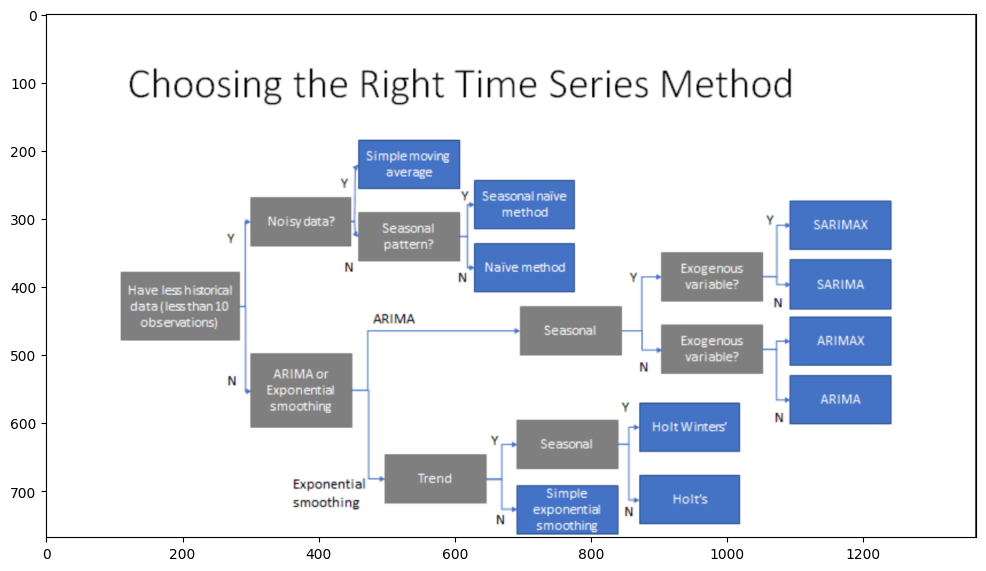

In [37]:
import urllib.request

url = 'https://drive.google.com/uc?id=13CMOznWZ9eAGTI2PyoMy_wgRff2FDjvS'


urllib.request.urlretrieve(url, 'myimage.jpg')

img = plt.imread('myimage.jpg')
plt.imshow(img)
plt.show()


## Insight:
The methods that we will employ to develop the models are:

1. Simple exponential smoothing
2. Holt’s exponential smoothing
3. Holt-Winters’ exponential smoothing using the additive method
4. Holt-Winters’ exponential smoothing using the multiplicative method
5. Autoregressive (AR) model
6. Moving average (MA) model
7. Autoregressive Moving Average (ARMA) model
8. Autoregressive Integrated Moving Average (ARIMA) model
9. Seasonal Autoregressive Integrated Moving Average (SARIMA) model.

## Lets create Smoothing Techniques model

### Naive method
The naive method is a simple forecasting technique where the forecast for the next time period is equal to the observed value from the current time period. It assumes that there will be no significant change or trend in the future.

The formula for the naive method can be written as:

y(t+1) = y(t)

where y(t) represents the observed value at time t and y(t+1) represents the forecast for the next time period.

The naive method is easy to understand and quick to compute. However, it is suitable only for short-term forecasting and works well only when the time series data is stationary with no trend or seasonality.

The main advantage of the naive method is its simplicity, but its main disadvantage is that it cannot capture any patterns or trends in the data and can lead to poor forecast accuracy for time series with non-stationary behavior or complex patterns.

In [38]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1]
y_hat_naive['naive_forecast'] 

Order Date
2014-07-01    55151.4699
2014-08-01    55151.4699
2014-09-01    55151.4699
2014-10-01    55151.4699
2014-11-01    55151.4699
2014-12-01    55151.4699
Name: naive_forecast, dtype: float64

### Lets Plot Naive Method

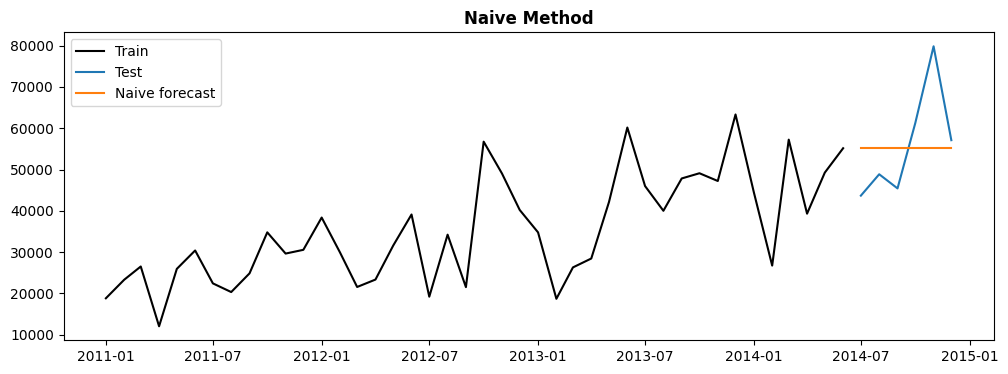

In [39]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train',color = 'k')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method', fontweight= 'bold')
plt.show()

## Insight:
The chart displays the predicted values based on the previous month's data.

## Lets Calculate RMSE and MAPE

In [40]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47


## Insights:
The Root Mean Square Error (RMSE) and Mean Absolute Percentage Error (MAPE) values for the Naive method are 12355.97 and 17.47, respectively.

## Simple average method
The Simple Average method is a forecasting method that calculates the average of past observations and uses that as the prediction for future values. This method assumes that future values will be similar to the past values, and that there is no trend, seasonality, or other underlying patterns in the data.

The formula for the Simple Average method is:
Forecast = (Y1 + Y2 + ... + Yn) / n
where Y1, Y2, ..., Yn are the historical values of the variable being forecasted, and n is the number of observations used in the average.

Advantages of the Simple Average method include its simplicity and ease of implementation, as well as its ability to work well for stable and stationary time series data. However, it may not work well for data with trends, seasonality, or other complex patterns, as it does not account for these factors in its calculation.

In [41]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()
y_hat_avg['avg_forecast']

Order Date
2014-07-01    35253.632814
2014-08-01    35253.632814
2014-09-01    35253.632814
2014-10-01    35253.632814
2014-11-01    35253.632814
2014-12-01    35253.632814
Name: avg_forecast, dtype: float64

## Lets Plot Simple average method

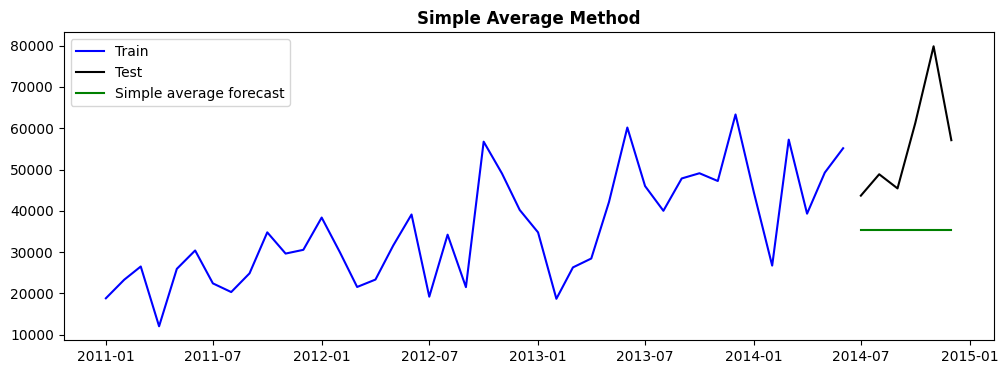

In [42]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train',color ='blue')
plt.plot(test['Sales'], label='Test',color = 'black')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast',color = 'green')
plt.legend(loc='best')
plt.title('Simple Average Method', fontweight='bold')
plt.show()

## Insights:
Although the train and test datasets exhibited both trend and seasonality, the projected green line does not display any trend and seasonality.

## Lets Calculate RMSE and MAPE

In [43]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34


## Insights:
The Root Mean Square Error (RMSE) and Mean Absolute Percentage Error (MAPE) values for the Simple Average method are 24146.06 and 34.34, respectively.

## Simple moving average method 
The simple moving average (SMA) method is a time series forecasting method that involves calculating the average of the most recent "n" observations in a time series. The "n" value is a fixed window size, and the average value is then used to predict the next value in the time series.

Here are some key points about the SMA method:

- The SMA method is a simple and easy-to-understand method of time series forecasting.
- It is a type of linear smoothing technique that reduces noise and identifies underlying trends and patterns in the data.
- The method requires the selection of a window size "n", which determines the number of past observations used to calculate the average.
- As new data becomes available, the window is shifted forward in time, and the forecast is updated using the most recent "n" observations.
- The method assumes that the time series is stationary, meaning that it has a constant mean and variance over time.
- The SMA method may not perform well when there are sudden changes or irregularities in the time series data.

Overall, the SMA method can be a useful technique for forecasting time series data with relatively stable patterns and trends, but it may not be suitable for more complex or irregular time series.

In [44]:
y_hat_sma = data.copy()
ma_window = 6
y_hat_sma['sma_forecast'] = data['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

## Lets Plot the Simple moving average method 

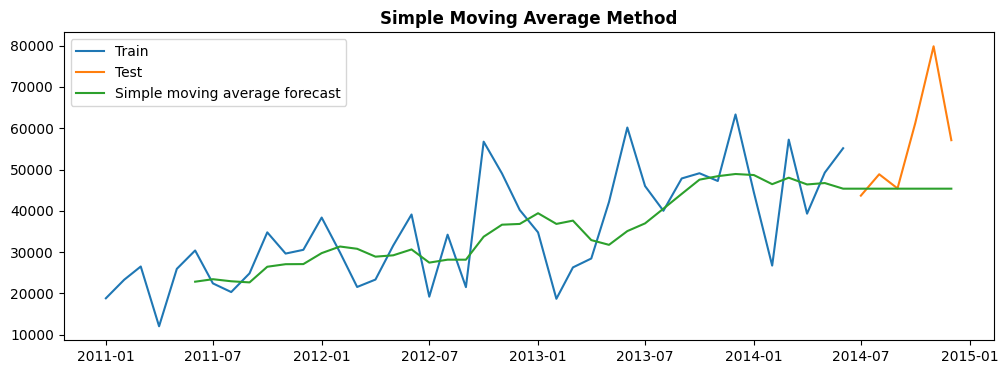

In [45]:
 plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method', fontweight= 'bold')
plt.show()

## Insights:
In the case of the 6-month window, both the train and test datasets showed trends and seasonal patterns, which were also present in the projected green line.

## Lets Calculate  RMSE and MAPE

In [46]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,16294.34,16.80


## Insights
The Root Mean Square Error (RMSE) and Mean Absolute Percentage Error (MAPE) values for the Simple moving average method  are 14756.73	 and 15.82, respectively.

## Exponential smoothing methods

## Simple exponential smoothing
Simple exponential smoothing is a time series forecasting method that uses a weighted average of past observations to make predictions. The weight of each observation decreases exponentially as the observation gets older. The method is simple and easy to implement, making it a popular choice for short-term forecasting.

The method involves calculating the exponentially weighted moving average of past observations and using that average to forecast the next value in the series. The forecast is a weighted combination of the most recent observation and the previous forecast, with the weight given to the most recent observation decreasing exponentially over time.

The method requires the estimation of a smoothing parameter, called alpha, which controls the rate at which the weights decay over time. The value of alpha determines how much weight is given to recent observations versus past observations in the forecast.

Simple exponential smoothing is appropriate for data that has no trend or seasonality, as it only models the level of the series. It can be extended to handle trends and seasonality by using more advanced smoothing methods, such as Holt's linear method or seasonal exponential smoothing.

In [47]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

C:\Users\sanje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanje\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


## Lets plot the Exponential Smoothing

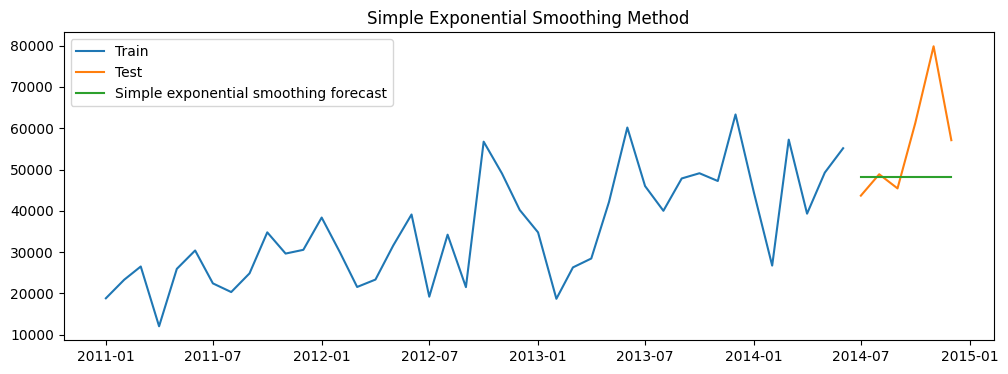

In [48]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

## Insights
It is evident from the blue and orange lines in the data that there is a pattern of trend and seasonality. The green line represents the forecasted level, indicating that this particular model is capable of identifying only the level, which is expected to remain constant at around 40k to 50k between 2014 and 2015.

## Lets Calculate RMSE and MAPE

In [49]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,16294.34,16.80
0,Simple exponential smoothing forecast,14627.34,15.74


## Insights
The Root Mean Square Error (RMSE) and Mean Absolute Percentage Error (MAPE) values for the Simple exponential smoothing forecast  are 14627.34	 and 15.74, respectively.

## Holt's method with trend
Holt's method with trend, also known as double exponential smoothing, is an extension of simple exponential smoothing that incorporates a trend component into the forecast. It is used for time series forecasting when the data exhibits a trend over time.

Holt's method with trend involves two components: the level (or intercept) and the trend. The level represents the average value of the series, while the trend represents the slope or direction of the series. The method uses exponential smoothing to update and forecast both the level and the trend.

Here are the key features of Holt's method with trend:

1. Level component: The level at each time period is calculated using exponential smoothing. It considers the previous level and adds a smoothed difference to capture the current level.

2. Trend component: The trend at each time period is calculated using exponential smoothing. It considers the previous trend and adds a smoothed difference to capture the current trend.

3. Smoothing parameters: Holt's method with trend requires two smoothing parameters, alpha and beta. Alpha controls the smoothing of the level component, while beta controls the smoothing of the trend component. These parameters need to be tuned to optimize the forecast accuracy.

4. Forecasting: The forecast at each time period is a combination of the level and trend components. The level is used as the forecast for the next period, and the trend is used to project the level into the future.

Holt's method with trend is particularly useful when the time series exhibits a clear and persistent trend. It provides improved forecasting accuracy compared to simple exponential smoothing, as it takes into account the underlying trend in the data. However, it may not perform well for time series with complex patterns or irregular fluctuations.

In [50]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 18638.66351999999, 'initial_trend': 964.8086345454553, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


## Lets Plot Holt's method with trend 

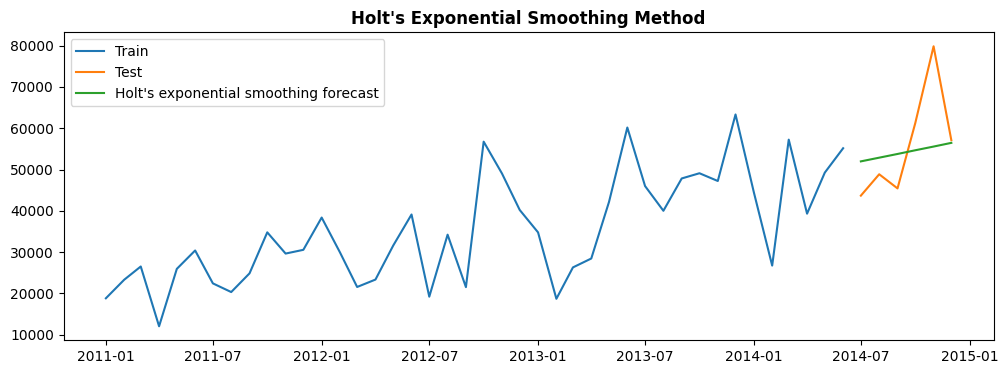

In [51]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method', fontweight='bold')
plt.show()

## Insights:
The test data is represented by the blue line, while the orange line represents the training data. The green line shows the forecasted trend and level of the data, which is seen to follow the pattern observed in the time period of approximately 2014 to 2015.

## Lets calculate RMSE and MAPE

In [52]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,16294.34,16.80
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,11456.45,14.64


## Insights:

The Root Mean Square Error (RMSE) and Mean Absolute Percentage Error (MAPE) values for the Holt's exponential smoothing method  11456.45 and 14.64 , respectively.

## Holt Winters' additive method with trend and seasonality
Holt Winters' additive method with trend and seasonality is a forecasting method used to predict time series data with both trend and seasonality components. This method uses a combination of exponential smoothing and linear regression to make predictions.

The method works by decomposing the time series data into three components: level, trend, and seasonality. The level component represents the baseline value of the time series, while the trend component represents the direction and rate of change over time. The seasonality component represents the repeating patterns or cycles that occur within the time series.

The Holt Winters' additive method then applies exponential smoothing to each of these components to generate forecasts. Exponential smoothing involves calculating a weighted average of past observations, with more recent observations given higher weights.

To generate forecasts, the method uses three smoothing parameters: alpha, beta, and gamma. Alpha controls the smoothing of the level component, beta controls the smoothing of the trend component, and gamma controls the smoothing of the seasonality component.

Once the three components have been smoothed, they are combined to generate the final forecast using the following equation:

Forecast = Level + Trend + Seasonality

The Holt Winters' additive method with trend and seasonality is a powerful forecasting tool that can accurately predict time series data with complex patterns. However, it requires careful parameter tuning and may not perform well on data with irregular or unpredictable patterns.

In [53]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.005, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.0001, 'damping_trend': nan, 'initial_level': 25546.140294166653, 'initial_trend': 468.00483560606244, 'initial_seasons': array([  3952.88057396,  -9211.53080729, -10479.58736354,  -9282.54725729,
         1016.15604896,  12737.03211146,  -8578.55198854,  -2357.83653854,
        -6344.09922604,  15891.83603021,   8787.51308021,   3868.73533646]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\sanje\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


## Lets Plot the Holt Winters' additive method with trend and seasonality

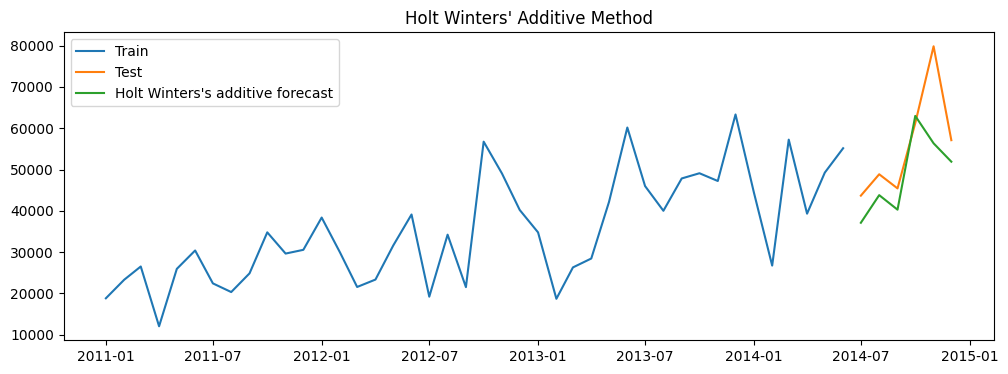

In [54]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

## Insights:
The   blue and green lines in this graph indicate the training and test data, respectively. The orange line represents the seasonality, trend, and level of the data, which is observed to be around the time period of approximately 2014 to 2015.

## Lets Calculate RMSE and MAPE

In [55]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,16294.34,16.80
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,11456.45,14.64
0,Holt Winters' additive method,10624.26,13.02


## Insights:
The Root Mean Square Error (RMSE) and Mean Absolute Percentage Error (MAPE) values for the Holt Winters' additive method 10624.26 and 13.02 , respectively.

## Holt Winter's multiplicative method with trend and seasonality
Holt-Winters' multiplicative method is a forecasting technique that extends the Holt-Winters' additive method by allowing the seasonality to vary in proportion to the level of the time series. This method is suitable for data where the seasonal fluctuations increase or decrease as the level of the time series increases or decreases, respectively.

The method involves the following steps:

1. Decompose the time series into its components: level, trend, and seasonality.
2. Calculate the seasonal indices by averaging the values of each season across all years.
3. Divide the time series by the seasonal indices to obtain the deseasonalized time series.
4. Apply Holt's method to the deseasonalized time series to obtain the level and trend estimates.
5. Multiply the level and trend estimates by the seasonal indices to obtain the final forecast.

Holt-Winters' multiplicative method is useful for forecasting time series data with both trend and seasonality, where the seasonal fluctuations increase or decrease with the level of the time series. However, this method may not work well for time series data with irregular or unpredictable fluctuations.

In [56]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.005, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.0001, 'damping_trend': nan, 'initial_level': 25546.140294166653, 'initial_trend': 468.00483560606244, 'initial_seasons': array([1.14330212, 0.76036851, 0.69869713, 0.73937527, 1.02255778,
       1.32751953, 0.72524578, 0.90263868, 0.79512941, 1.50506931,
       1.26466724, 1.11542925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\sanje\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


## Lets plot Holt Winter's multiplicative method with trend and seasonality

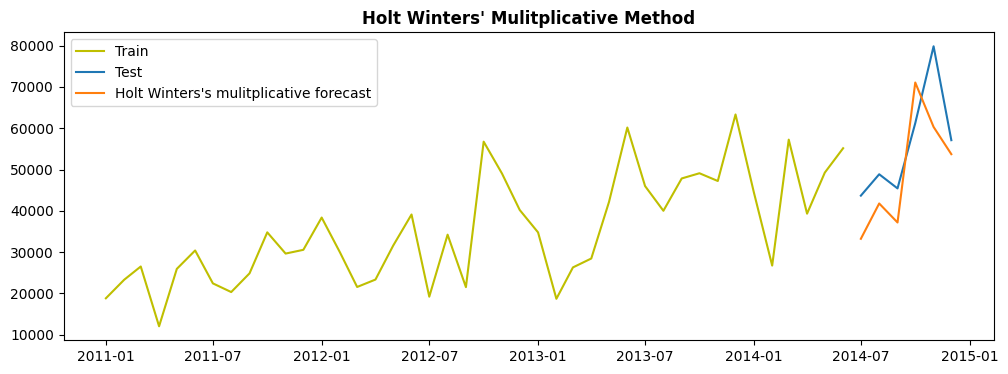

In [57]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train',color = 'y')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method', fontweight='bold')
plt.show()

## Insights:
In this plot, the yellow line represents the training data, and the blue line represents the test data. The orange line represents the seasonality, trend, and level of the data, which is observed to be around the time period of approximately 2014 to 2015.

## Lets Calculate RMSE and MAPE

In [58]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,16294.34,16.80
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,11456.45,14.64
0,Holt Winters' additive method,10624.26,13.02
0,Holt Winters' multiplicative method,10931.27,17.17


#### Insights:
The Root Mean Square Error (RMSE) and Mean Absolute Percentage Error (MAPE) values for the Holt Winters' multiplicative method 10931.27 and 17.17 , respectively.

## <u> Auto Regressive methods


## <u> Lets check Stationarity and non-stationary time series

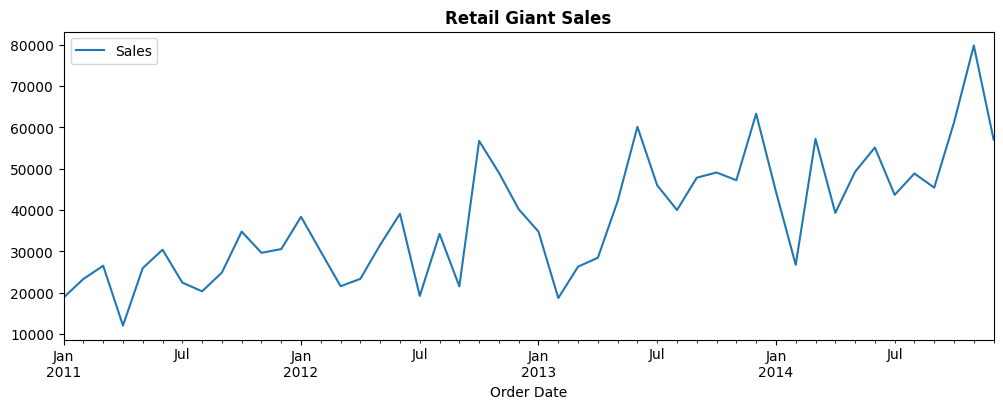

In [59]:
data['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales', fontweight='bold')
plt.show(block=False)

In [60]:
def test_stationarity(timeseries):
    
    #Determining rolling statistics
    rolmean = timeseries.rolling(window = 6).mean()
    rolstd = timeseries.rolling(window = 6).std()
    
    #plotting rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    st = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling  Mean & Standard Deviation')
    plt.show()

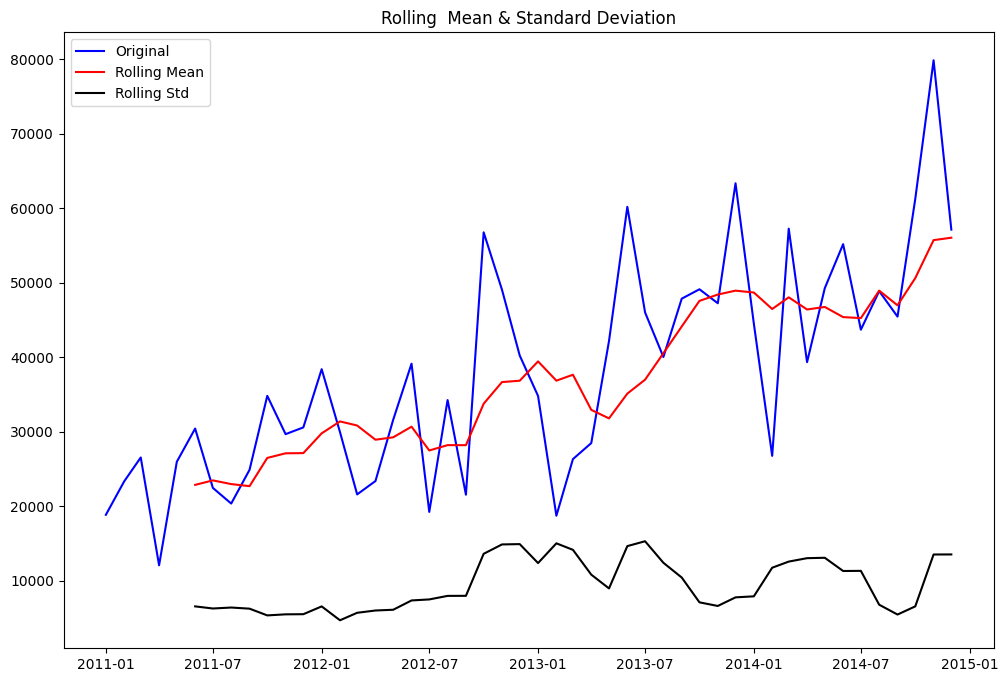

In [61]:
test_stationarity(data['Sales'])

## Insights:
The graph The data is not stationary the mean, variance, and autocorrelation structure of the data is changing over time

## Lets perform Augmented Dickey-Fuller (ADF) test 
Null Hypothesis  (H0)
 : The series is not stationary  p−value>0.05
 
Alternate Hypothesis: (H1)
  The series is stationary  p−value<=0.05

In [62]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


## Insights:
In statistical testing, we use the null hypothesis (H0) and alternate hypothesis (H1) to determine the stationarity of a series. If the p-value is greater than 0.05, we accept the null hypothesis, indicating that the series is not stationary. However, if the p-value is less than or equal to 0.05, we reject the null hypothesis and accept the alternate hypothesis, which indicates that the series is stationary. In this case, the p-value is 0.011, which is less than 0.05, so we reject the null hypothesis and conclude that the series is  stationary.

## Lets perform Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
Null Hypothesis (H0)
: The series is stationary p−value>0.05


Alternate Hypothesis:(H1)
 The series is not stationary  p−value<=0.05

In [63]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.103752
Critical Values @ 0.05: 0.46
p-value: 0.010000


C:\Users\sanje\AppData\Local\Temp\ipykernel_20712\1178181437.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(data['Sales'])


## Note:
Based on the ADF Test, we concluded that the data is stationary. However, when we applied the KPSS test, the data was found to be non-stationary. This conflicting result suggests that further transformations are required for the data.

## Insights:
We set up a null hypothesis (H0) that the series is stationary, and an alternate hypothesis (H1) that the series is not stationary. We obtained a p-value of 0.024, which is less than the significance level of 0.05. This means we reject the null hypothesis and conclude that the series is not stationary.

## We will perform a Box Cox transformation to stabilize the variance of the data.


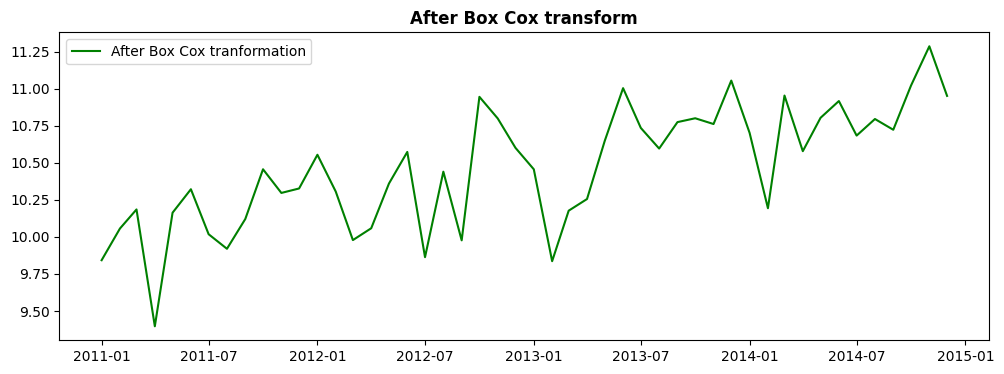

In [64]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Sales'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation',color = 'green')
plt.legend(loc='best')
plt.title('After Box Cox transform', fontweight= 'bold')
plt.show()

## Lets Remove Trend usning Differencing

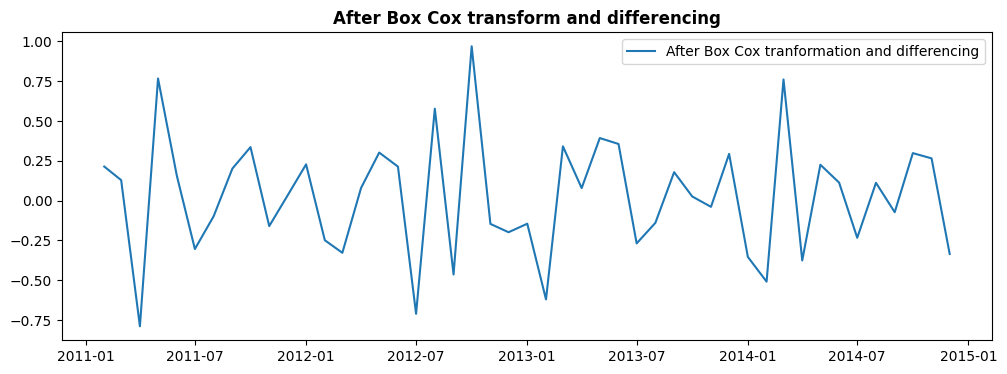

In [65]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing', fontweight='bold')
plt.show()

In [66]:
data_boxcox_diff.dropna(inplace=True)
data_boxcox_diff.tail()

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
Name: Sales, dtype: float64

## Lets Perform  Augmented Dickey-Fuller (ADF) test and  Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test


In [67]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


## Insights:
The p-value of 0.0001 is less than the significance level of 0.05, so we reject the null hypothesis (H0) and conclude that the series is stationary.

In [68]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.264930
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\sanje\AppData\Local\Temp\ipykernel_20712\3639712988.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(data_boxcox_diff)


## Insights:
The p-value of 0.100 is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis (H0), which states that the series is stationary.

## Autocorrelation function (ACF)


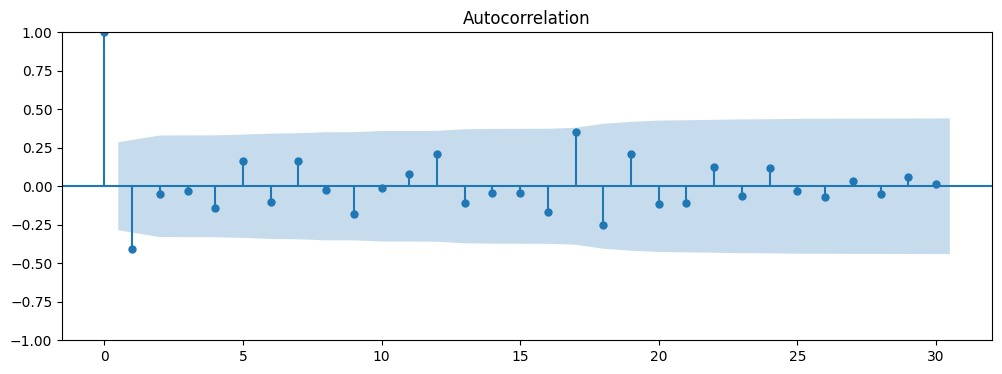

In [69]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

## Partial autocorrelation function (PACF)

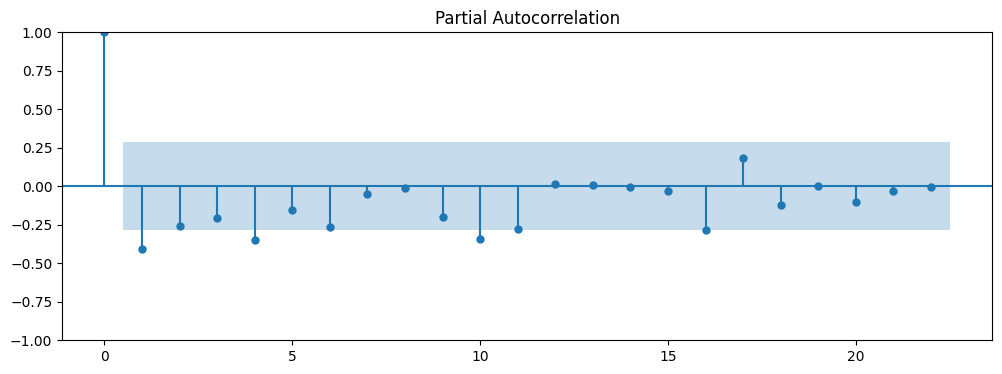

In [70]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 22)
plt.show()

## Lets perform train test split on data_boxcox_diff


In [71]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

## Lets Perform Auto regression method (AR)
Auto regression (AR) method is a time series forecasting technique that uses a linear regression equation to predict future values based on past values of the same variable. In AR, the dependent variable (i.e., the variable being predicted) is regressed on one or more lagged values of itself.

The general equation for an AR(p) model is:

yt = c + φ1*y(t-1) + φ2*y(t-2) + ... + φp*y(t-p) + εt

where:
- yt is the value of the dependent variable at time t
- c is a constant term
- φ1, φ2, ..., φp are the parameters to be estimated, which represent the weights of the lagged values
- εt is the error term at time t

The parameter p is called the "order" of the model and represents the number of lagged values used in the regression equation. The optimal value of p can be determined using techniques such as the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC).

To make predictions using an AR model, we simply plug in the lagged values of the dependent variable from the test set into the regression equation to obtain the predicted values for the corresponding time periods. The accuracy of the predictions can be evaluated using metrics such as Mean Squared Error (MSE) or Root Mean Squared Error (RMSE).

In [72]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const     0.024251
ar.L1    -0.406725
sigma2    0.124377
dtype: float64


C:\Users\sanje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Lets Recover the original time series

In [73]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

## Lets plot the time series

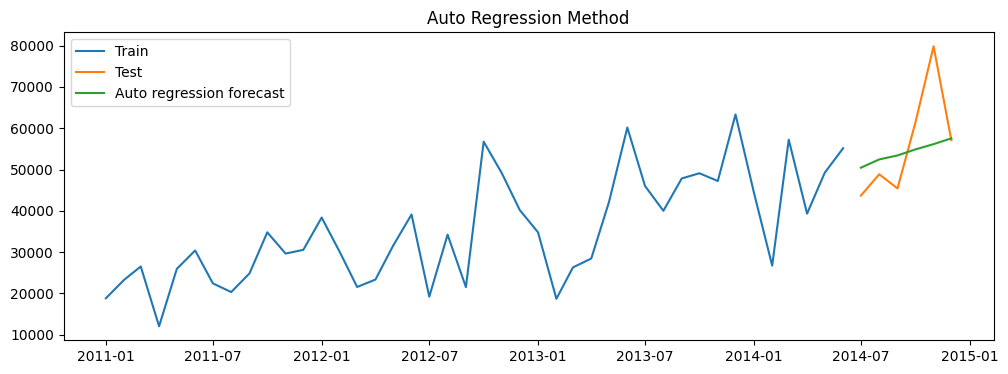

In [74]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

## Insights:
The training data is represented by the blue line in this plot, while the orange line represents the test data. The green line depicts the forecast with trend and level of the data, and it is seen to bisect the test data set, indicating its reliability. The forecasted trend and level of the data are observed to be around the time period of approximately 2014 to 2015.

## Lets Calculate RMSE and MAPE


In [75]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,16294.34,16.80
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,11456.45,14.64
0,Holt Winters' additive method,10624.26,13.02
0,Holt Winters' multiplicative method,10931.27,17.17
0,Autoregressive (AR) method,10988.64,13.55


## Insights:

The Root Mean Square Error (RMSE) and Mean Absolute Percentage Error (MAPE) values for the Autoregressive (AR) method 10988.64 and 13.55 , respectively.

## Lets perform Moving average method

In [76]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const     0.021411
ma.L1    -0.999859
sigma2    0.079380
dtype: float64


C:\Users\sanje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Recover the Time Series and plot the forecast

In [77]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

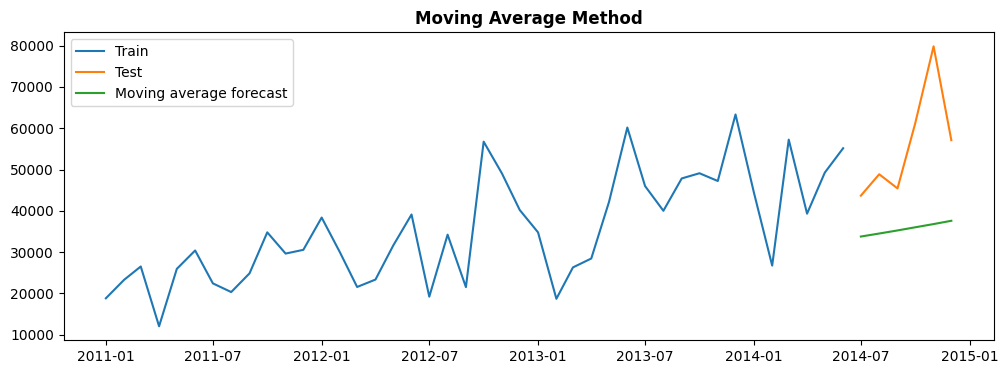

In [78]:
plt.figure(figsize=(12,4))
plt.plot(data['Sales'][:train_len], label='Train')
plt.plot(data['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method', fontweight='bold')
plt.show()

## Insights:
In this graph, the window size is only 1 month, and there is no seasonality observed. The data is seen to exhibit a trend and level pattern, with the blue line representing the training data and the orange line representing the test data. The green line shows the forecast of the data. 

## Lets Calculate RMSE And MAPE


In [79]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,16294.34,16.80
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,11456.45,14.64
0,Holt Winters' additive method,10624.26,13.02
0,Holt Winters' multiplicative method,10931.27,17.17
0,Autoregressive (AR) method,10988.64,13.55
0,Moving Average (MA) method,23368.07,33.95


## Insights:

The Root Mean Square Error (RMSE) and Mean Absolute Percentage Error (MAPE) values for the Moving Average (MA) method	23368.07 and 	33.95 , respectively.

## Auto regression moving average method (ARMA) 

Auto Regression Moving Average (ARMA) method is a time series forecasting technique that models the dependence between an observation and a linear combination of lagged observations and lagged forecast errors. ARMA is a combination of two models, the Autoregressive (AR) model and the Moving Average (MA) model.

The AR part of ARMA uses the past values of the time series to predict future values. The MA part of ARMA models the error term or the residuals of the time series.

The order of the ARMA model is specified by two parameters, p and q, where p is the order of the AR model and q is the order of the MA model. The ARMA model assumes that the time series is stationary.

ARMA is a generalization of the AR and MA models, where the AR model assumes that the current value of the time series depends on its past values, while the MA model assumes that the current value of the time series depends on its past forecast errors.

ARMA models can be trained and evaluated using standard statistical techniques such as maximum likelihood estimation and Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) for model selection.

In [80]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const     0.021465
ar.L1     0.074544
ma.L1    -0.999941
sigma2    0.079218
dtype: float64


C:\Users\sanje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Recover the original timeseries and plot the forecast



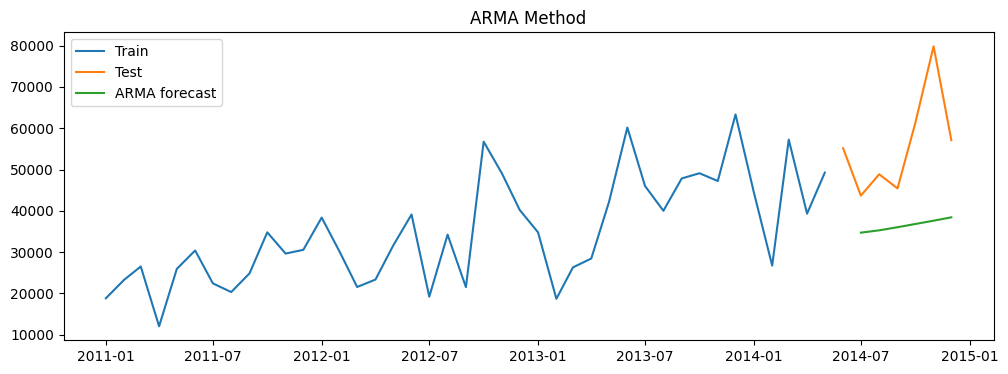

In [81]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

plt.figure(figsize=(12,4))
plt.plot( data['Sales'][:train_len-1], label='Train')
plt.plot(data['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

## Insights
In this graph, the blue line represents the training data, the orange line represents the test data, and the green line represents the forecast data. The data is observed to have both a level and trend component that is predicted by the model. However, the model appears to be underfitting the data, indicating that it is not capturing all the relevant information and may not be the best fit for the data. 

In this approach, we are smoothing out the monthly effect of the season to only track the level and trend of the data. However, we are observing underfitting due to a couple of reasons.

Firstly, we are using the moving average (MA) component in ARMA, which may not be suitable for large datasets with more than 10 data points. In this case, we have a large number of data points, which may not be effectively captured by the MA component.

Additionally, the model may not be capturing all the relevant information and could be missing important features or patterns in the data, leading to underfitting

## Lets Calculate RMSE and MAPE


In [82]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,16294.34,16.80
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,11456.45,14.64
0,Holt Winters' additive method,10624.26,13.02
0,Holt Winters' multiplicative method,10931.27,17.17
0,Autoregressive (AR) method,10988.64,13.55
0,Moving Average (MA) method,23368.07,33.95
0,Autoregressive moving average (ARMA) method,22659.70,32.41


## Insights:

The Root Mean Square Error (RMSE) and Mean Absolute Percentage Error (MAPE) values for the Autoregressive moving average (ARMA) method	22659.70 and 32.41 , respectively.

## Auto regressive integrated moving average (ARIMA)

AutoRegressive Integrated Moving Average (ARIMA) is a time series forecasting method that combines the concepts of autoregressive (AR), integrated (I), and moving average (MA) models. It is a widely used approach for modeling and predicting time series data that exhibit trend and seasonality.

The ARIMA model is specified by three parameters: p, d, and q.

- The p parameter represents the order of the autoregressive (AR) component, which captures the relationship between the current observation and a specified number of lagged observations.

- The d parameter represents the degree of differencing required to make the time series stationary. Differencing involves subtracting the previous observation from the current observation to remove trends or seasonality.

- The q parameter represents the order of the moving average (MA) component, which models the relationship between the current observation and a specified number of lagged forecast errors.

ARIMA models are effective in capturing both short-term dependencies (AR and MA components) and long-term trends (integration component) in time series data. The model can be trained using maximum likelihood estimation or other optimization techniques to estimate the parameters.

Once the ARIMA model is trained, it can be used to make future predictions by forecasting the next values based on the past observations and forecast errors. The accuracy of the ARIMA model can be evaluated using various metrics such as mean squared error (MSE) or root mean squared error (RMSE) by comparing the predicted values with the actual values.

ARIMA models are versatile and can be applied to various types of time series data, making them widely used in fields such as economics, finance, and forecasting.


In [83]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

ar.L1     0.113931
ma.L1    -0.793407
sigma2    0.101984
dtype: float64


C:\Users\sanje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Lets recover the time series forecast and plot it 

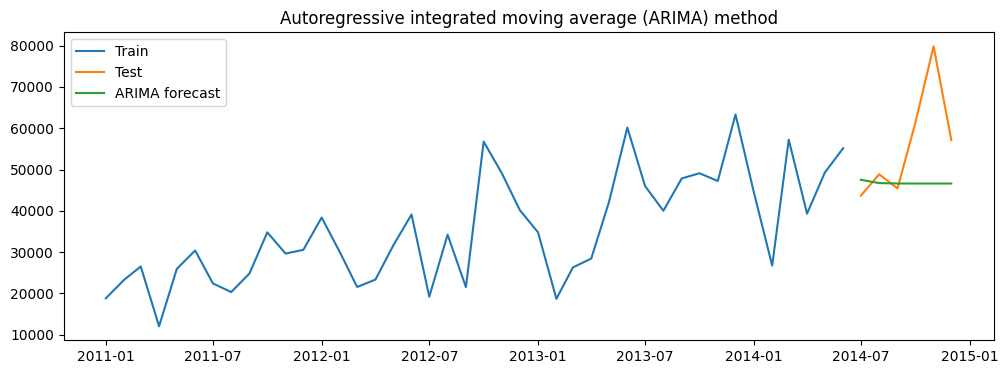

In [84]:
y_hat_arima = data_boxcox.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox.index.min(), data_boxcox.index.max())
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox_diff'])


plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

## Insights
The ARIMA is predicting perfectly , but it has only found level and following trend.

## Lets Calculate RMSE And MAPE

In [85]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,16294.34,16.80
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,11456.45,14.64
0,Holt Winters' additive method,10624.26,13.02
0,Holt Winters' multiplicative method,10931.27,17.17
0,Autoregressive (AR) method,10988.64,13.55
0,Moving Average (MA) method,23368.07,33.95
0,Autoregressive moving average (ARMA) method,22659.70,32.41


## Insights:

The Root Mean Square Error (RMSE) and Mean Absolute Percentage Error (MAPE) values for the Autoregressive integrated moving average (ARIMA) Method	15536.82 and 16.61 , respectively.

## Seasonal auto regressive integrated moving average (SARIMA)

In [86]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

C:\Users\sanje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sanje\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ar.L1      -0.041713
ma.L1      -0.996606
ar.S.L12    0.099769
ma.S.L12   -0.968054
sigma2      0.058485
dtype: float64


## Recover original time series forecast and plot it

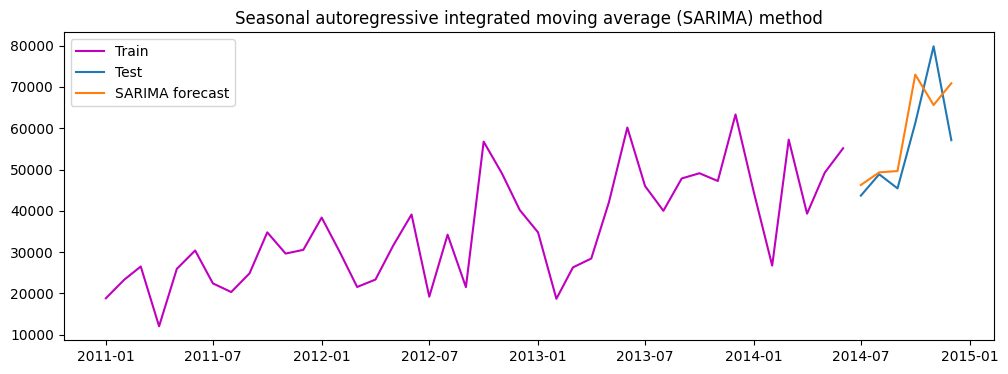

In [87]:
y_hat_sarima = data_boxcox.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox.index.min(), data_boxcox.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])


plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train',color = 'm')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

## Insights:
It is predictly better then other model, but it is slightly under predicting. It is following the seasonality with level and trend.

## Lets Calculate RMSE and MAPE

In [88]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,16294.34,16.80
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,11456.45,14.64
0,Holt Winters' additive method,10624.26,13.02
0,Holt Winters' multiplicative method,10931.27,17.17
0,Autoregressive (AR) method,10988.64,13.55
0,Moving Average (MA) method,23368.07,33.95
0,Autoregressive moving average (ARMA) method,22659.70,32.41


## Insights:

The Root Mean Square Error (RMSE) and Mean Absolute Percentage Error (MAPE) values for the	Seasonal auto regressive integrated moving average (SARIMA) 9617.98	and 12.88 , respectively.	

## <font color=Orange> <div align="center"><u style="border-bottom: 2px solid">Conclusion
Based on the analysis of the data, it can be inferred that the Holt-Winters additive method is the most suitable technique for smoothing in forecasting. Furthermore, among the ARIMA models, the Seasonal Autoregressive Integrated Moving Average (SARIMA) method is the most appropriate for forecasting.